# Detección de neumonía
## Por: AIRE
### - Luis Carlos Romero Cardenas.
### - Maria Camila Plazas Gómez.
### - Alejandra Gómez.
### - Santiago. 

## 1. Importar datos

In [2]:
!pip install kagglehub

  Obtaining dependency information for kagglehub from https://files.pythonhosted.org/packages/49/bf/c2a24567bb6bd80c1fe7cb2ed1a332666476f69c313256aff96094bef93e/kagglehub-0.3.12-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/68.0 kB ? eta -:--:--
   ------------------ --------------------- 30.7/68.0 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 68.0/68.0 kB 1.2 MB/s eta 0:00:00


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

100%|██████████| 2.29G/2.29G [08:33<00:00, 4.80MB/s]

Extracting files...


Path to dataset files: C:\Users\Luis Romero\.cache\kagglehub\datasets\paultimothymooney\chest-xray-pneumonia\versions\2


In [10]:
import os
import tensorflow as tf

# Ruta completa al conjunto de datos
path=''
data_dir = os.path.join(path, 'Data', 'chest_xray')
data_dir

# Cargar las imágenes desde las carpetas train, test y val
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
val_dir = os.path.join(data_dir, 'val')

# Crear datasets para train, test y val
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(256, 256),
    batch_size=32
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(256, 256),
    batch_size=32
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=(256, 256),
    batch_size=32
)

print("Datasets cargados exitosamente.")

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Datasets cargados exitosamente.


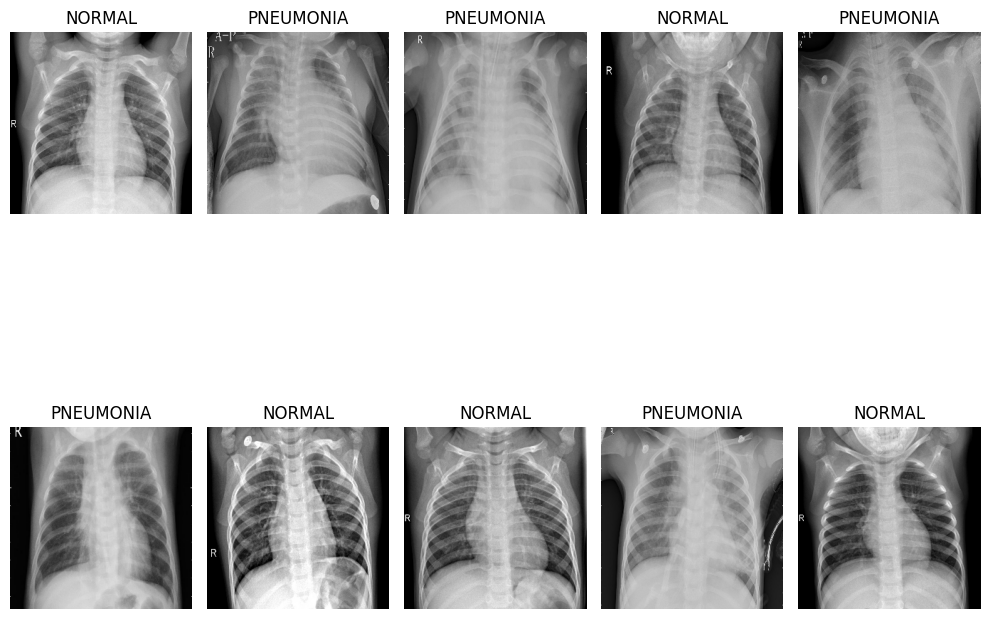

In [11]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

# Obtener las clases del conjunto de entrenamiento
class_names = train_dataset.class_names

# Inicializar contadores para las categorías
category_counts = {class_name: 0 for class_name in class_names}
max_images_per_category = 5

# Crear una lista para almacenar las imágenes y etiquetas
images_to_plot = []
labels_to_plot = []

# Iterar sobre el conjunto de entrenamiento
for images, labels in train_dataset:
    for image, label in zip(images, labels):
        class_name = class_names[label.numpy()]
        if category_counts[class_name] < max_images_per_category:
            images_to_plot.append(image)
            labels_to_plot.append(class_name)
            category_counts[class_name] += 1
        # Romper el bucle si ya tenemos suficientes imágenes
        if all(count >= max_images_per_category for count in category_counts.values()):
            break
    if all(count >= max_images_per_category for count in category_counts.values()):
        break

# Graficar las imágenes
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(zip(images_to_plot, labels_to_plot)):
    plt.subplot(2, max_images_per_category, i + 1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title(label)
    plt.axis("off")
plt.tight_layout()
plt.show()